<a href="https://colab.research.google.com/github/hamidrezanorouzi/myPythonTemp/blob/main/sinFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the input data

In [24]:
import numpy as np

n = 1000
trainingSetLen = 600;
noiseMag = 0.001
x = np.linspace(-1,1, num = n).reshape(-1, 1)
np.random.shuffle(x)
epsilon = noiseMag * (2*np.random.rand(n)-1).reshape(-1,1)
y = np.sin(2*np.pi*x)+epsilon

x_train = x[0:trainingSetLen]
y_train = y[0:trainingSetLen]
x_valid = x[trainingSetLen:]
y_valid = y[trainingSetLen:]

# Building model

In [25]:
from tensorflow import keras

def buildModel():
  model = keras.Sequential([
      keras.layers.Dense(100,activation='tanh'),
      keras.layers.Dense(50,activation='tanh'),
      keras.layers.Dense(1,activation='tanh')
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(), loss='mse', metrics=['mae'])
  return model
model = buildModel()



# Training the model

In [26]:
history = model.fit(
    x_train, y_train,
    epochs = 1000,
    batch_size = 20,
    validation_data = (x_valid, y_valid)
    )




5/5 [==============================] - 0s 2ms/step


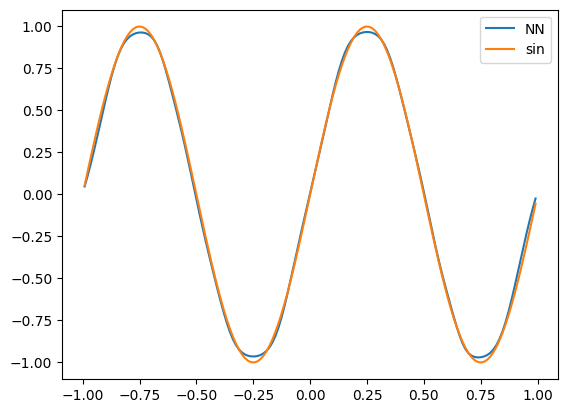

In [27]:
import matplotlib.pyplot as plt
x_test = np.linspace(-.9913213,.991233123,150)
y_test = model.predict(x_test)
y_sin = np.sin(2*np.pi*x_test)
plt.plot(x_test, y_test)
plt.plot(x_test,y_sin)
plt.legend(('NN', 'sin'))